In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/Luisa/.pyenv/versions/3.7.12/envs/BDL-A1/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Read Dataset
df = pd.read_parquet('../data/final_dataset_v2.parquet')
df.head()

,index,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Albany,2020-03-26,171,0.000543,0,0.000000,314848,0.0,0.0,...,80.0,43.0,3.795482,0.254091,-51.0,-11.0,43.0,-53.0,-55.0,23.0
1,110535,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
2,110536,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
3,110537,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
4,110538,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0


In [3]:
# Set Facility Name and Date as indexes 
df_sorted = df.copy()
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted = df.sort_values(by=['Facility Name','date']).set_index(['Facility Name','date'])
df_sorted.drop(['index'], axis=1, inplace=True)
df_sorted.head()

county  daily_cases  \
Facility Name              date                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  Otsego            3   
                           2020-03-27  Otsego            5   
                           2020-03-28  Otsego            7   
                           2020-03-29  Otsego           10   
                           2020-03-30  Otsego           17   

                                       daily_cases_by_population  \
Facility Name              date                                    
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.000051   
                           2020-03-27                   0.000085   
                           2020-03-28                   0.000120   
                           2020-03-29                   0.000171   
                           2020-03-30                   0.000290   

                                       daily_deaths  \
Facility Name              date                       
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0   
                           2020-03-27             0   
                           2020-03-28             1   
                           2020-03-29             1   
                           2020-03-30             1   

                                       daily_deaths_by_population  POP2020  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                    0.000000    58524   
                           2020-03-27                    0.000000    58524   
                           2020-03-28                    0.000017    58524   
                           2020-03-29                    0.000017    58524   
                           2020-03-30                    0.000017    58524   

                                       Partially Vaccinated  Fully Vaccinated  \
Facility Name              date                                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                   0.0               0.0   
                           2020-03-27                   0.0               0.0   
                           2020-03-28                   0.0               0.0   
                           2020-03-29                   0.0               0.0   
                           2020-03-30                   0.0               0.0   

                                       Non Vaccinated  \
Facility Name              date                         
A.O. FOX MEMORIAL HOSPITAL 2020-03-26             0.0   
                           2020-03-27             0.0   
                           2020-03-28             0.0   
                           2020-03-29             0.0   
                           2020-03-30             0.0   

                                       Partially Vaccinated per Population  \
Facility Name              date                                              
A.O. FOX MEMORIAL HOSPITAL 2020-03-26                                  0.0   
                           2020-03-27                                  0.0   
                           2020-03-28                                  0.0   
                           2020-03-29                                  0.0   
                           2020-03-30                                  0.0   

                                       ...  Number of ICU Beds By County  \
Facility Name              date        ...                                 
A.O. FOX MEMORIAL HOSPITAL 2020-03-26  ...                          14.0   
                           2020-03-27  ...                          14.0   
                           2020-03-28  ...                          14.0   
                           2020-03-29  ...                          14.0   
                           2020-03-30  ...                          14.0   

                                       Number of ICU Beds Available By County  \
Facility Name              date                                  

In [10]:
df_sorted.columns

Index(['county', 'daily_cases', 'daily_cases_by_population', 'daily_deaths',
       'daily_deaths_by_population', 'POP2020', 'Partially Vaccinated',
       'Fully Vaccinated', 'Non Vaccinated',
       'Partially Vaccinated per Population',
       'Fully Vaccinated per Population', 'Non Vaccinated per Population',
       'Patients Age 55 to 64 Years', 'Patients Age 65 to 74 Years',
       'Patients Age 75 to 84 Years', 'Patients Currently Hospitalized',
       'Patients Newly Admitted', 'Patients Positive After Admission',
       'Patients Currently in ICU', 'Patients Currently ICU Intubated',
       'Total Beds', 'Number of Beds Available', 'Number of ICU Beds',
       'Number of ICU Beds Available', 'Total Beds By County',
       'Number of Beds Available By County', 'Number of ICU Beds By County',
       'Number of ICU Beds Available By County',
       'Total Beds By County per thousand ppl',
       'Number of ICU Beds By County per thousand ppl',
       'retail_and_recreation_percen

In [31]:
# subset date range
train_start_date = '2020-01-01'
train_end_date = '2021-11-30'

test_start_date = '2021-11-30'
test_end_date = '2022-11-01'


subset = df_sorted.copy()
subset['day_of_week'] = subset.index.get_level_values('date').dayofweek
subset['day_of_month'] = subset.index.get_level_values('date').day
subset['overload'] = subset['Number of Beds Available'] + \
    subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

# diff column with difference between yesterday and day
diff_cols = []
for i in range(1, 4):
    subset.loc[:, 'overload_T-' +
               str(i)] = subset.groupby(level=0)['overload'].shift(i)
    subset.loc[:, 'overload_T-' +
               str(i) + '_diff'] = subset.groupby(level=0)['overload_T-'+str(i)].diff()
    diff_cols.append('overload_T-' +
                     str(i))
    diff_cols.append('overload_T-'+str(i) + '_diff')

features_list = ['daily_cases',
                    'daily_deaths', 'Patients Age 65 to 74 Years', 'Patients Age 55 to 64 Years',
                     'Patients Currently Hospitalized', 'Patients Age 55 to 64 Years']
for col in features_list:
    subset.loc[:, col+'_diff'] = subset.groupby(level=0)[col].diff()
    # diff_cols.append(col)
    diff_cols.append(col+'_diff')

# overload 7 day in future
subset.loc[:, 'overload-14day'] = subset.groupby(level=0)['overload'].shift(14)
# dropping NAs
subset = subset.dropna()

target = 'overload-14day'
cols = ['overload-14day', 'overload', *diff_cols, 'day_of_week', 'day_of_month',
        'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline']

subset_temp_test = subset[(subset.index.get_level_values('date') > '2021-11-30')]
subset = subset[cols]
# subset = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                 (subset.index.get_level_values('date') <= '2022-01-31')]


subset_test = subset[(subset.index.get_level_values('date') > test_start_date) & (subset.index.get_level_values('date') <= test_end_date)]
# subset_test = subset[(subset.index.get_level_values('date') > test_start_date)]
subset = subset[(subset.index.get_level_values('date') >= train_start_date) & (subset.index.get_level_values('date') <= train_end_date)]
# subset = subset[(subset.index.get_level_values('date') <= train_end_date)]

subset.tail(10)


# subset_train = subset[(subset.index.get_level_values('date') >= '2021-11-01') &
#                       (subset.index.get_level_values('date') <= '2022-01-31')]
# subset_test = subset[(subset.index.get_level_values('date') >= '2022-02-01') &
#                      (subset.index.get_level_values('date') <= '2022-02-28')]
# subset_train.shape, subset_test.shape


overload-14day  overload  \
Facility Name                     date                                   
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21            -3.0      -1.0   
                                  2021-11-22             0.0      -2.0   
                                  2021-11-23            -4.0       2.0   
                                  2021-11-24            -1.0      -2.0   
                                  2021-11-25            -2.0      -2.0   
                                  2021-11-26            -1.0      -4.0   
                                  2021-11-27            -1.0      -2.0   
                                  2021-11-28            -4.0      -3.0   
                                  2021-11-29             0.0      -2.0   
                                  2021-11-30            -2.0      -5.0   

                                              overload_T-1  overload_T-1_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21           0.0                2.0   
                                  2021-11-22          -1.0               -1.0   
                                  2021-11-23          -2.0               -1.0   
                                  2021-11-24           2.0                4.0   
                                  2021-11-25          -2.0               -4.0   
                                  2021-11-26          -2.0                0.0   
                                  2021-11-27          -4.0               -2.0   
                                  2021-11-28          -2.0                2.0   
                                  2021-11-29          -3.0               -1.0   
                                  2021-11-30          -2.0                1.0   

                                              overload_T-2  overload_T-2_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21          -2.0               -1.0   
                                  2021-11-22           0.0                2.0   
                                  2021-11-23          -1.0               -1.0   
                                  2021-11-24          -2.0               -1.0   
                                  2021-11-25           2.0                4.0   
                                  2021-11-26          -2.0               -4.0   
                                  2021-11-27          -2.0                0.0   
                                  2021-11-28          -4.0               -2.0   
                                  2021-11-29          -2.0                2.0   
                                  2021-11-30          -3.0               -1.0   

                                              overload_T-3  overload_T-3_diff  \
Facility Name                     date                                          
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21          -1.0                1.0   
                                  2021-11-22          -2.0               -1.0   
                                  2021-11-23           0.0                2.0   
                                  2021-11-24          -1.0               -1.0   
                                  2021-11-25          -2.0               -1.0   
                                  2021-11-26           2.0                4.0   
                                  2021-11-27          -2.0               -4.0   
                                  2021-11-28          -2.0                0.0   
                                  2021-11-29          -4.0               -2.0   
                                  2021-11-30          -2.0                2.0   

                                              daily_cases_diff  \
Facility Name                     date                           
WYOMING COUNTY COMMUNITY HOSPITAL 2021-11-21              32.0   
                                  2021-1

In [6]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    # print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

---------LR----------
LR: 0.842240 (0.058993)
---------XGB----------
XGB: 0.833745 (0.045672)
---------RF----------
RF: 0.819711 (0.052694)


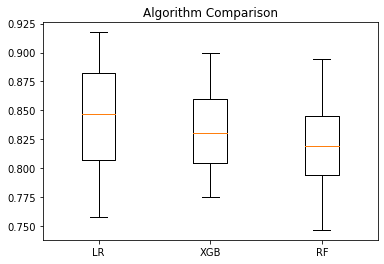

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

models = []
models.append(('LR', LinearRegression()))
# models.append(('NN', MLPRegressor(solver='lbfgs')))  # neural network
# models.append(('KNN', KNeighborsRegressor()))
models.append(('XGB', XGBRegressor()))
# Ensemble method - collection of many decision trees
models.append(('RF', RandomForestRegressor(n_estimators=10)))
# models.append(('SVR', SVR(gamma='auto')))  # kernel = linear

X_cols = ['date', 'Facility Name', *cols[1:]]
y_cols = target

# Evaluate each model in turn
results = []
names = []
feature_importances = {}
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=4)
    cv_results = []
    feature_importances[name] = []
    print(f"---------{name}----------")
    for train_index, test_index in tscv.split(subset):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'],
                                                                                       columns='level_2').drop([target], axis=1), subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=['Facility Name', 'date'], columns='level_2').drop([target], axis=1)
        y_train, y_test = subset.iloc[train_index].stack(-1).reset_index().pivot_table(values=0, index=[
            'Facility Name', 'date'], columns='level_2')[target], subset.iloc[test_index].stack(-1).reset_index().pivot_table(values=0, index=[
                'Facility Name', 'date'], columns='level_2')[target]
        # print(y_train)

        clf = model
        _ = clf.fit(X_train, y_train)
        feature_importances[name].append(_)

        preds = clf.predict(X_test)
        # accuracy for the current fold only
        r2score = clf.score(X_test, y_test)
        cv_results.append(r2score)
        # regression_results(y_test, preds)

    # cv_results = cross_val_score(
    #     model, X_train, y_train, cv=tscv, scoring='r2')
    cv_results = np.asarray(cv_results)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


/Users/Luisa/Documents/GitHub/cmpt-733-term-project/notebooks/helper.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model.feature_names_in_, rotation=90)
/Users/Luisa/Documents/GitHub/cmpt-733-term-project/notebooks/helper.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model.feature_names_in_, rotation=90)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

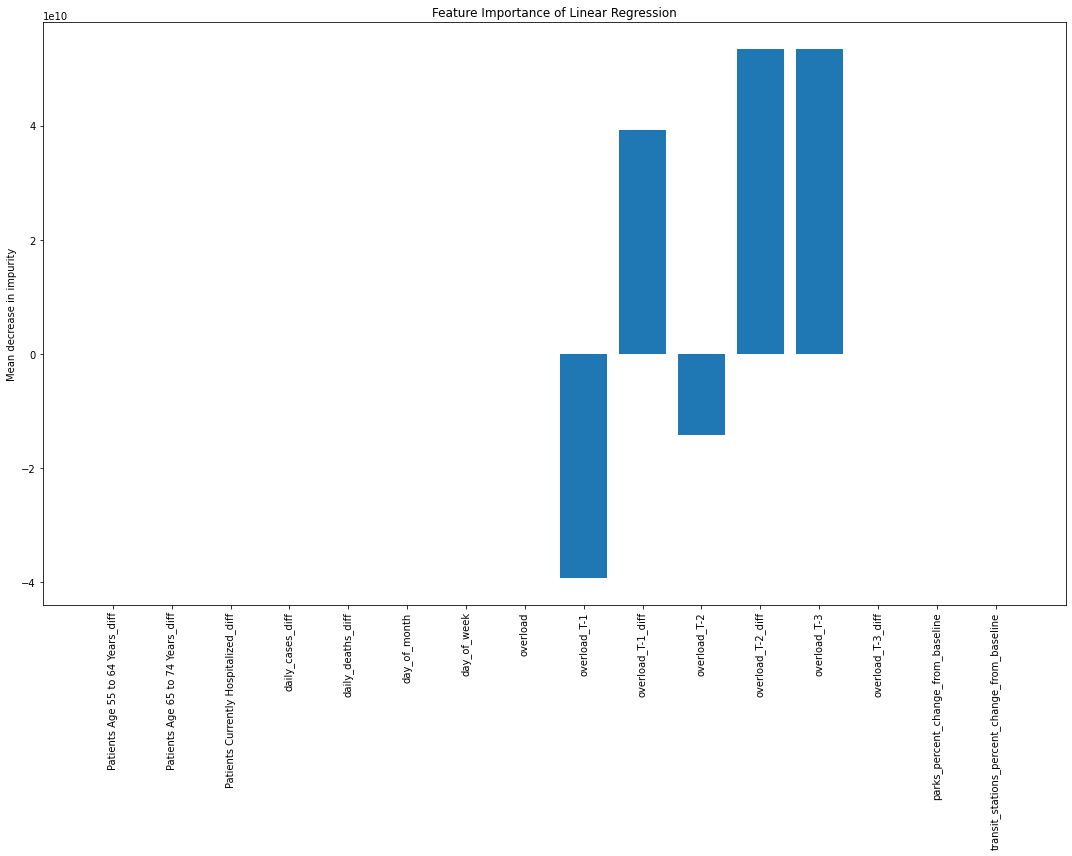

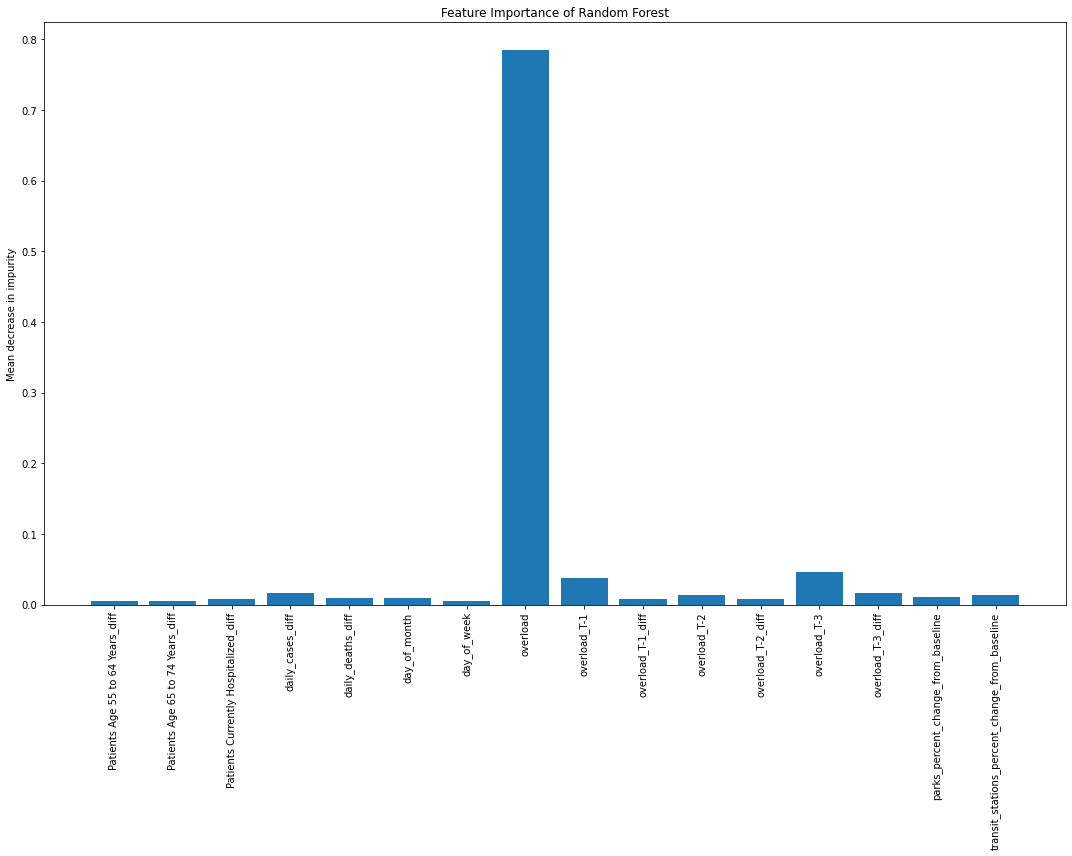

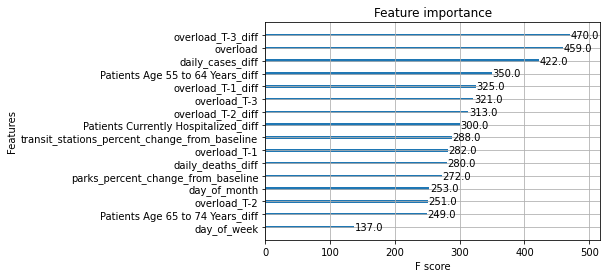

In [33]:
import importlib
import helper
import xgboost
importlib.reload(helper)
#Feature Importance of LR
_model = feature_importances['LR'][1]
fig_name = 'LR_feature_importance_plot_v3'
helper.plot_feature_importance(_model, title="Feature Importance of Linear Regression", save_fig=fig_name)

#Feature Importance of RF
_model = feature_importances['RF'][1]
fig_name = 'RF_feature_importance_plot_v3'
helper.plot_feature_importance(_model, title="Feature Importance of Random Forest", save_fig=fig_name)

f = _model.feature_names_in_
_model = feature_importances['XGB'][1]
# _model.get_booster().feature_names = f
xgboost.plot_importance(_model.get_booster())
# helper.plot_feature_importance(_model, title="Feature Importance of XGB", x_cols=f_cols)


In [27]:
import matplotlib.pyplot as plt
model1 = feature_importances['LR'][1]
model2 = feature_importances['RF'][1]
model3 = feature_importances['XGB'][1]


def plot_predictions(model, analyse_hsp="AUBURN MEMORIAL HOSPITAL"):
    test_set = subset_test[subset_test.index.get_level_values(
        'Facility Name') == analyse_hsp]
    test_X = test_set.drop(target, axis=1)

    y_preds = model.predict(test_X)
    y_test = test_set[y_cols]

    x = [0]*13
    l = len(y_preds) - 13
    x += y_preds[:l].tolist()
    # len(x)

    # y_test.shape,y_preds.shape,
    # # print(y_test)
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(test_X.index.get_level_values('date'), y_test)
    ax.plot(test_X.index.get_level_values('date'), x)
    ax.legend(['Actual', 'Predicted'])
# # subset_test


plot_predictions(model1)
plot_predictions(model2)
plot_predictions(model3)


/Users/Luisa/.pyenv/versions/3.7.12/envs/BDL-A1/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 18 features, but LinearRegression is expecting 17 features as input.

In [ ]:
import importlib
import helper
importlib.reload(helper)
import warnings
warnings.filterwarnings('ignore')
helper.top_k_hsp_predction_loss(model1, subset_test, target, 10)

/Users/Luisa/.pyenv/versions/3.7.12/envs/BDL-A1/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


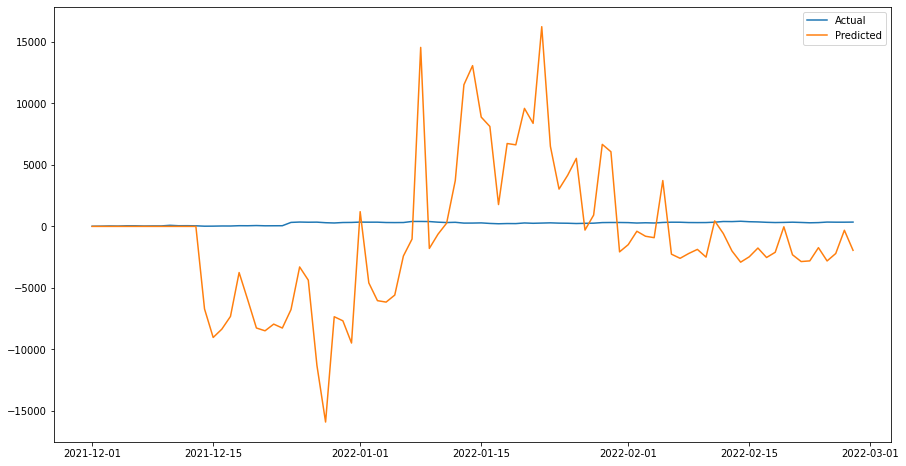

In [28]:
plot_predictions(model1,'LONG ISLAND JEWISH MEDICAL CENTER')